# The sampling distribution of $\hat{\beta}_0$ and $\hat{\beta}_1$

Generate $100$ data points from the following model:

$$Y_i = 2 + (3 * X_i) + \epsilon_i
\quad \forall i = 1,\ldots,100.$$

In [61]:
import numpy as np
from scipy import stats as stats
from matplotlib import pyplot as plt

In [206]:
#generate x data
seed = 123 #did not assign
n = 100
x = stats.norm.rvs(loc = 0, scale = 4, size = n)
beta_0 = 2
beta_1 = 3
#generate y_mean
y_mean = beta_0 + beta_1*x
#generate epsilon
epsilon = stats.norm.rvs(loc = 0, scale = 6, size = n)
#generate y with error terms
y_data = y_mean + epsilon

Get a scatter plot of the generated data, then plot the mean line (red) and  the OLS regression line.

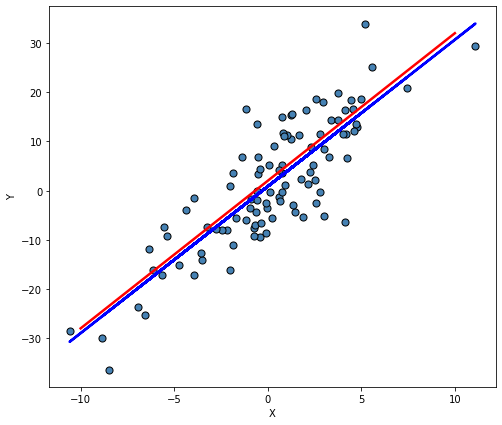

In [259]:
#initialize layout
fig, ax = plt.subplots(figsize = (8, 7))
#add scatterplot
ax.scatter(x, y_data, s=50, alpha=1, color="steelblue", edgecolors="k")
#fit linear regression via least squares with numpy.polyfit
#it returns slope (b) and an intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y_data, deg=1)
#plot regression line
ax.plot(x, a + (b * x), color="blue", lw=2.5)
#fit a straight line passing through beta0 and beta1
xseq = np.linspace(-10, 10, num=n)
plt.plot(xseq, beta_0+(beta_1*xseq), color="red", lw=2.5)
plt.xlabel("X")
plt.ylabel("Y");

If you repeatedly, say 5000 times, generate the data from the same data generating mechanism (equation above), store the intercept and slope parameter estiamtes for each run, plot the histogram of intercept estimates and histogram of slope estimates, respectively, you will see that OLS estimates have a bell-shaped curve centered around the true value set in the data generating mechanism.

In [260]:
MC_run = 5000

#create any empty list
#generate MC_run times data sets
#for each data sets, fit a SLR and get beta1hat

beta0_coef = []
beta1_coef = []

for i in range(MC_run):
    n = 100
    beta_0 = 2
    beta_1 = 3
    #generate x
    x = stats.norm.rvs(loc = 0, scale = 4, size = n)
    #generate y
    y_data = beta_0 + beta_1*x + stats.norm.rvs(loc = 0, scale = 6, size = n)
    #calculate beta1_ols for each data set
    beta1, beta0 = np.polyfit(x, y_data, deg=1)
    beta0_coef.append(beta0) 
    beta1_coef.append(beta1) 

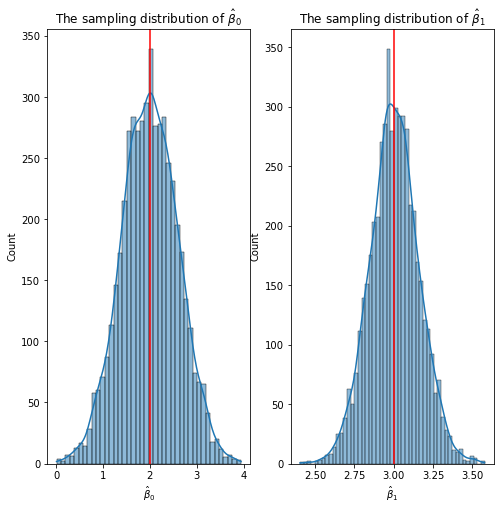

In [290]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(8, 8))
sns.histplot(ax=axes[0], x = beta0_coef, kde = True)
sns.histplot(ax=axes[1], x = beta1_coef, kde = True)
axes[0].set_xlabel(xlabel = r"$\hat{\beta}_0$")
axes[1].set_xlabel(xlabel = r"$\hat{\beta}_1$")
axes[0].set_title(r"The sampling distribution of $\hat{\beta}_0$")
axes[1].set_title(r"The sampling distribution of $\hat{\beta}_1$")
axes[0].axvline(x=2, color = 'red')
axes[1].axvline(x=3, color = 'red');
#plt.savefig('/Users/gulinan/Fall22_Courses/MAT555E/Week_02/images/sampling.png')

In [1]:
import session_info
session_info.show()